In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import time
import glob

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

In [3]:
os.getcwd()

'/Users/fuma/adtech-compe-2018-e/ml/notebook'

In [4]:
file_path = glob.glob("../../data/*")
csv_path = glob.glob("../../data/*.csv")

In [5]:
file_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/cpc_budget.json',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

In [6]:
csv_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

# read data 

In [7]:
banner_size_master = pd.read_csv(csv_path[0])
demogra = pd.read_csv(csv_path[1])
df_train = pd.read_csv(csv_path[2])
banner_position_master = pd.read_csv(csv_path[3])
device_type_master = pd.read_csv(csv_path[4])

In [8]:
banner_size_master

,id,bannerSize
0,1,320×50
1,2,320×100
2,3,300×250
3,4,320×480


In [9]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [10]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [11]:
banner_position_master

,id,bannerPosition
0,1,Above the Fold
1,2,Below the Fold
2,3,Header
3,4,Footer
4,5,Sidebar
5,6,Full Screen


In [12]:
device_type_master

,id,deviceType
0,1,Mobile
1,2,PC
2,3,Tablet


# check dtypes etc. 

In [15]:
print("------- demogra --------")
print("")  
print("data type:\n",demogra.dtypes)
print("")
print("number of null:\n",demogra.isnull().sum())
print("")
print("data length:\n",len(demogra))
print("")
print("u_unique:\n",demogra.nunique())

------- demogra --------

data type:
 deviceId      object
age          float64
gender        object
hasChild      object
income       float64
isMarried     object
dtype: object

number of null:
 deviceId          0
age           59935
gender            0
hasChild     225409
income       174807
isMarried    124871
dtype: int64

data length:
 500000

u_unique:
 deviceId     500000
age              65
gender            3
hasChild          2
income          419
isMarried         2
dtype: int64


In [16]:
print("------- df_train --------")
print("")  
print("data type:\n",df_train.dtypes)
print("")
print("number of null:\n",df_train.isnull().sum())
print("")
print("data length:\n",len(df_train))
print("")
print("u_unique:\n",df_train.nunique())

------- df_train --------

data type:
 deviceId           object
bannerPosition      int64
bannerSize          int64
deviceType          int64
floorPrice        float64
id                 object
mediaId             int64
osType             object
timestamp           int64
advId               int64
isClick             int64
dtype: object

number of null:
 deviceId          0
bannerPosition    0
bannerSize        0
deviceType        0
floorPrice        0
id                0
mediaId           0
osType            0
timestamp         0
advId             0
isClick           0
dtype: int64

data length:
 10000000

u_unique:
 deviceId            500000
bannerPosition           6
bannerSize               4
deviceType               1
floorPrice          386585
id                10000000
mediaId               1000
osType                   2
timestamp           604800
advId                   20
isClick                  2
dtype: int64


In [17]:
# 基本統計量
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bannerPosition,10000000.0,3.880406e+00,1.656776,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
bannerSize,10000000.0,2.249909e+00,1.219575,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
deviceType,10000000.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
floorPrice,10000000.0,8.980794e+03,2901.756569,0.000000e+00,7.253950e+03,8.156400e+03,9.525550e+03,3.304275e+04
mediaId,10000000.0,4.994179e+02,288.674275,0.000000e+00,2.490000e+02,4.990000e+02,7.490000e+02,9.990000e+02
timestamp,10000000.0,1.535080e+09,174568.228693,1.534777e+09,1.534928e+09,1.535080e+09,1.535231e+09,1.535382e+09
advId,10000000.0,1.050292e+01,5.765755,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01
isClick,10000000.0,2.453404e-01,0.430289,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [18]:
# 基本統計量
demogra.describe().T

,count,mean,std,min,25%,50%,75%,max
age,440065.0,45.500342,9.995720,15.0,39.0,46.0,52.0,79.0
income,325193.0,537.125630,93.662296,39.0,465.0,537.0,644.0,704.0


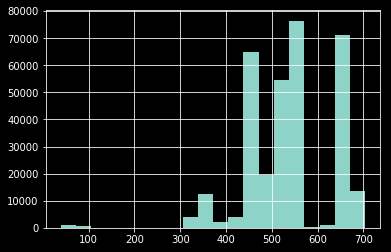

In [19]:
plt.style.use('dark_background')
demogra["income"].hist(bins=20)

# Click vs カテゴリ（df_train）

In [13]:
# click vs bannerPosition
cross_1 = pd.crosstab(df_train["bannerPosition"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_1 = pd.DataFrame(cross_1[1]/(cross_1[0] + cross_1[1]))

In [14]:
cross_1

isClick,0,1
bannerPosition,,
6,1348507,651118
5,1889379,511554
3,1221176,377250
4,1236110,365862
2,916735,282695
1,934689,264925


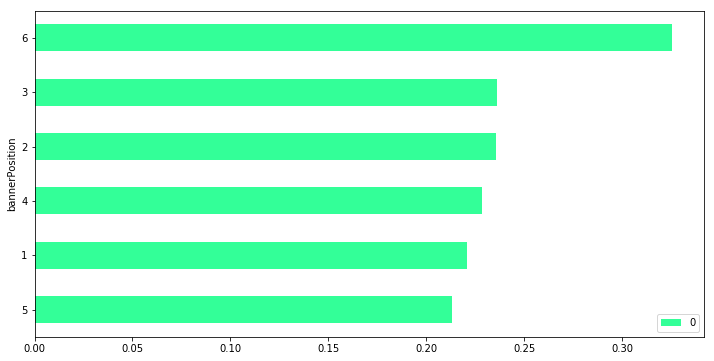

In [15]:
click_rate_rank_1.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

6:"Full Screen"はよくクリックされることがわかる。 

In [16]:
# click vs bannerSize
cross_2 = pd.crosstab(df_train["bannerSize"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_2 = pd.DataFrame(cross_2[1]/(cross_2[0] + cross_2[1]))

In [17]:
cross_2

isClick,0,1
bannerSize,,
1,3524002,975916
3,2283472,716288
4,1348507,651118
2,390615,110082


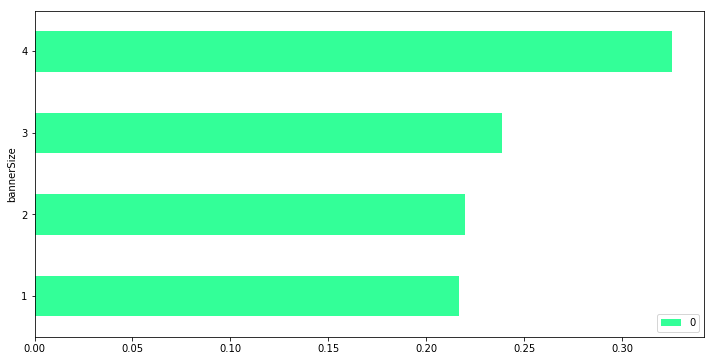

In [18]:
click_rate_rank_2.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

バナーがデカければデカイほどよくクリックされることがわかる。 

In [19]:
# click vs mediaId	
cross_3 = pd.crosstab(df_train["mediaId"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_3 = pd.DataFrame(cross_3[1]/(cross_3[0] + cross_3[1]))

In [20]:
cross_3

isClick,0,1
mediaId,,
806,6911,3176
394,6977,3147
95,6947,3120
784,7012,3088
745,7117,3068
19,7104,3063
64,6980,3055
167,7061,3053
176,7000,3040


In [21]:
click_rate_rank_3.sort_values(by=0,ascending=False)

,0
mediaId,
806,0.314861
394,0.310846
95,0.309924
149,0.306041
784,0.305743
64,0.304434
122,0.303256
184,0.303151
176,0.302789


メディアごとにクリックされる度に違いが出るのがわかる。

In [22]:
# click vs osType
cross_4 = pd.crosstab(df_train["osType"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_4 = pd.DataFrame(cross_4[1]/(cross_4[0] + cross_4[1]))

In [23]:
cross_4

isClick,0,1
osType,,
iOS,4881579,1619267
ANDROID,2665017,834137


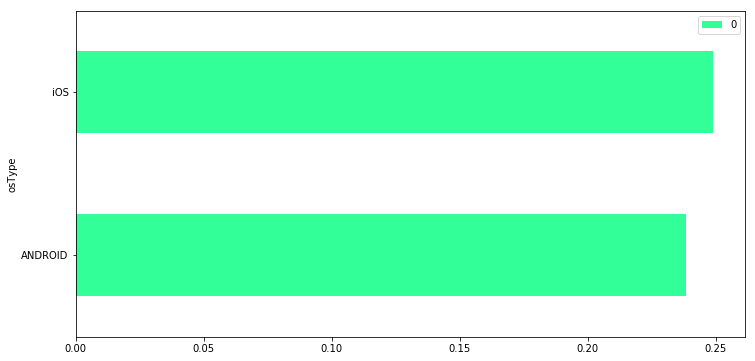

In [24]:
click_rate_rank_4.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

osのタイプはクリックにあんま関係なさそう。 

In [25]:
# click vs advId
cross_5 = pd.crosstab(df_train["advId"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_5 = pd.DataFrame(cross_5[1]/(cross_5[0] + cross_5[1]))

In [26]:
cross_5

isClick,0,1
advId,,
18,336466,163311
6,341661,158778
12,342946,157980
11,357445,142801
2,356414,142409
3,361577,138268
16,362584,137328
20,368535,133010
14,367565,132435


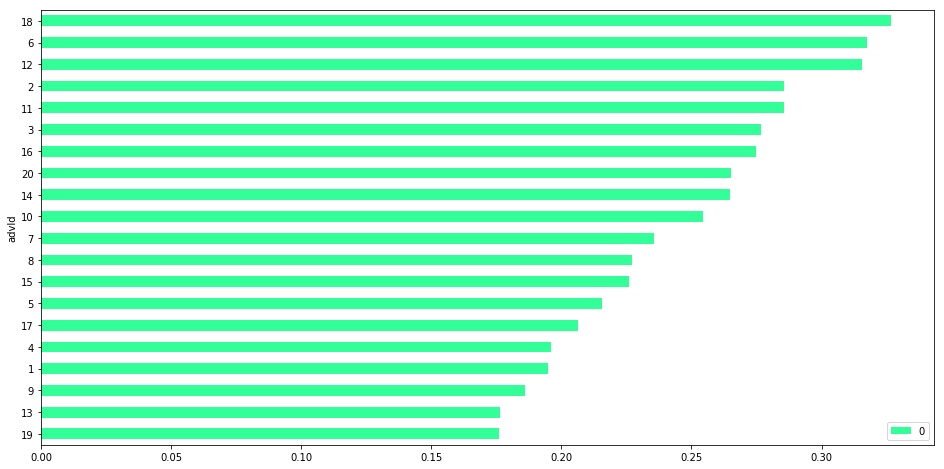

In [27]:
click_rate_rank_5.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(16,8), color="springgreen")

広告主によってまあまあクリックされ度が異なることがわかる。 

あとclick vs timestampが見れてないからあとで 

# target 

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

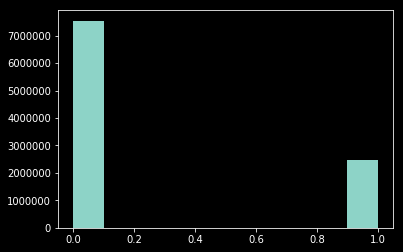

In [28]:
plt.style.use('dark_background')
plt.hist(df_train["isClick"])

In [29]:
print("非クリック・クリック比:",len(df_train[df_train["isClick"]==1])/len(df_train[df_train["isClick"]==0]))

非クリック・クリック比: 0.3251007474098256


アンダーサンプリング・オーバーサンプリング等はいらなそう！ 

# test model 

サーバーサイドとの検証用にとりあえずめっちゃ雑なモデルを作っておく 

In [37]:
# objectをlabel-encode
#from sklearn.preprocessing import LabelEncoder

#list_target = list(df_train.drop(["bannerPosition","bannerSize","deviceType",
#                                  "floorPrice","mediaId","timestamp","advId",
#                                  "isClick"],axis=1).columns)
#for target in list_target:
#    le = LabelEncoder()
#    le.fit(df_train[target])
#    df_train[target] = le.transform(df_train[target])

In [38]:
#df_train.head()

In [39]:
#X_train = df_train.drop(["id","isClick"],axis=1).values
#y_train = df_train["advId"].values

In [40]:
# ランダムフォレスト
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(random_state=0, n_estimators=10)
#rfc.fit(X_train, y_train)

In [41]:
# 訓練精度
#print('train acc: %.3f' % rfc.score(X_train, y_train))

In [42]:
# confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_train, rfc.predict(X_train))

In [43]:
#def plot_cm(confmat):
#    fig, ax = plt.subplots(figsize=(5, 5))
#    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
#    for i in range(confmat.shape[0]):
#        for j in range(confmat.shape[1]):
#            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
#    plt.title('predicted label')
#    plt.ylabel('true label')
#    plt.tight_layout() 
#    plt.show()

In [44]:
#plot_cm(cm)

# preprocess 

## df_train（岸田担当）

・ToDo:

①"bannerPosition"をone-hot-encoding。

②"deviceType"をone-hot-encoding。

③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

④"osType"をone-hot-encoding。

⑤"timestamp"を時間帯で区分して（午前・午後・深夜等）one-hot-encoding?

⑥"advId"をone-hot-encoding。

In [45]:
#①"bannerPosition"をone-hot-encoding。

In [30]:
df_train["bannerPosition"] = df_train["bannerPosition"].astype("str")

In [31]:
df_train["bannerPosition"].value_counts()

5    2400933
6    1999625
4    1601972
3    1598426
1    1199614
2    1199430
Name: bannerPosition, dtype: int64

In [32]:
banner_posi_dummies = pd.get_dummies(df_train["bannerPosition"])

In [33]:
banner_posi_dummies = banner_posi_dummies.drop(["1"],axis=1) # 多重共線性を避けるためにカラムを１つdrop
banner_posi_dummies = banner_posi_dummies.rename(columns={"2":"bannerPosition_below","3":"bannerPosition_header","4":"bannerPosition_footer",
                                    "5":"bannerPosition_Sidebar","6":"bannerPosition_Full"})

In [34]:
banner_posi_dummies.head()

,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,0


In [35]:
#②"deviceType"をone-hot-encoding。

In [36]:
df_train["deviceType"].value_counts()

1    10000000
Name: deviceType, dtype: int64

まさかの全部Mobile→"deviceType"は変数からはずす

In [37]:
#③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

"mediaId" : 「出現回数」と「出現したうちクリックされたレコード数」でカテゴリを置換

In [38]:
#df_train["mediaId"] = df_train["mediaId"].astype("str")

In [39]:
df_train.head(3)

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0


In [40]:
# 出現回数
mediaId_counts = pd.DataFrame(df_train["mediaId"].value_counts())
mediaId_counts.columns = ["mediaId_counts"]
mediaId_counts

,mediaId_counts
607,10304
258,10301
762,10286
332,10272
367,10270
844,10264
970,10246
651,10244
211,10243
734,10241


In [41]:
mediaId_counts["mediaId"] = list(mediaId_counts.index)
mediaId_counts

,mediaId_counts,mediaId
607,10304,607
258,10301,258
762,10286,762
332,10272,332
367,10270,367
844,10264,844
970,10246,970
651,10244,651
211,10243,211
734,10241,734


In [42]:
# 出現したうちクリックされたレコード数
# click vs mediaId
cross_6 = pd.crosstab(df_train["mediaId"], df_train["isClick"]).drop([0],axis=1).sort_values(by=1,ascending=False)
cross_6.columns = ["Click_counts_mediaId"]
cross_6

,Click_counts_mediaId
mediaId,
806,3176
394,3147
95,3120
784,3088
745,3068
19,3063
64,3055
167,3053
176,3040


In [43]:
cross_6["mediaId"] = list(cross_6.index)
cross_6

,Click_counts_mediaId,mediaId
mediaId,,
806,3176,806
394,3147,394
95,3120,95
784,3088,784
745,3068,745
19,3063,19
64,3055,64
167,3053,167
176,3040,176


In [44]:
#mediaId_dummies = pd.get_dummies(df_train["mediaId"])

In [45]:
#mediaId_columns = []
#for i in list(mediaId_dummies.columns):
#    new_col = "mediaId_" + str(i)
#    mediaId_columns.append(new_col)

In [46]:
#mediaId_dummies.columns = mediaId_columns

In [47]:
#mediaId_dummies = mediaId_dummies.drop(["mediaId_0"],axis=1) # 多重共線性を避けるためにカラムを１つdrop

In [48]:
#mediaId_dummies.head()

In [49]:
#④"osType"をone-hot-encoding。

In [50]:
df_train["osType"].value_counts()

iOS        6500846
ANDROID    3499154
Name: osType, dtype: int64

In [51]:
os_type_dummies = pd.get_dummies(df_train["osType"])
os_type_dummies = os_type_dummies.drop(["ANDROID"],axis=1)
os_type_dummies = os_type_dummies.rename(columns={"iOS":"os_type_iOS"})

In [52]:
os_type_dummies.head()

,os_type_iOS
0,1
1,1
2,1
3,0
4,1


In [53]:
#⑤"timestamp"から時・曜日を抽出してそれぞれ変数として持たせる

In [ ]:
import datetime
list_timestamp_int = list(df_train["timestamp"])

#"timestamp":int to timestamp
list_timestamp = []
for i in range(len(list_timestamp_int)):
    list_timestamp.append(datetime.datetime.fromtimestamp(list_timestamp_int[i]))

In [ ]:
list_timestamp

In [ ]:
# 時・曜日を抽出
list_hour = []
list_weekday = []# 0~4:月~金。5~6:土~日
for i in range(len(list_timestamp)):
    list_hour.append(list_timestamp[i].hour)
    list_weekday.append(list_timestamp[i].weekday())

In [ ]:
df_train["hour"] = list_hour
df_train["weekday"] = list_weekday

In [ ]:
df_train.head(3)

# （Click vs カテゴリ）（df_train）

In [ ]:
# click vs hour
cross_7 = pd.crosstab(df_train["hour"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_7 = pd.DataFrame(cross_7[1]/(cross_7[0] + cross_7[1]))

In [ ]:
cross_7

In [ ]:
click_rate_rank_7.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(16,8), color="springgreen")

In [ ]:
# click vs weekday
cross_8 = pd.crosstab(df_train["weekday"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_8 = pd.DataFrame(cross_8[1]/(cross_8[0] + cross_8[1]))

In [ ]:
cross_8

In [ ]:
click_rate_rank_8.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

hourもweekdayもあんまクリックに関係なさそう。 

# preprocess（再開） 

In [ ]:
df_train["hour"].value_counts()

In [ ]:
df_train["hour"] = df_train["hour"].astype("str")

In [ ]:
hour_dummies = pd.get_dummies(df_train["hour"])

In [ ]:
hour_columns = []
for i in list(hour_dummies.columns):
    new_col = "h_" + str(i)
    hour_columns.append(new_col)

In [ ]:
hour_dummies.columns = hour_columns

In [ ]:
hour_dummies = hour_dummies.drop(["h_0"],axis=1)

In [ ]:
hour_dummies.head()

In [ ]:
# 休日フラグ
weekday_mapping = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
df_train["weekday"] = df_train["weekday"].map(weekday_mapping)
df_train = df_train.rename(columns={"weekday":"isHoliday"})

In [ ]:
df_train.head()

一応"isHoliday"のクリッククロス集計を確認する↓ 

In [ ]:
# click vs isHoliday
cross_9 = pd.crosstab(df_train["isHoliday"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_9 = pd.DataFrame(cross_9[1]/(cross_9[0] + cross_9[1]))

In [ ]:
cross_9

In [ ]:
click_rate_rank_9.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

一致しすぎて悲しい。 

In [ ]:
#⑥"advId"をone-hot-encoding。

In [ ]:
df_train["advId"] = df_train["advId"].astype("str")

In [ ]:
df_train["advId"].value_counts()

In [ ]:
ad_id_dummies = pd.get_dummies(df_train["advId"])

In [ ]:
ad_id_columns = []
for i in list(ad_id_dummies.columns):
    new_col = "advId_" + str(i)
    ad_id_columns.append(new_col)

In [ ]:
ad_id_dummies.columns = ad_id_columns

In [ ]:
ad_id_dummies = ad_id_dummies.drop(["advId_1"],axis=1)

In [ ]:
ad_id_dummies.head()

・作った変数：df_train

・banner_posi_dummies

・mediaId_dummies -> 次元デカイから"mediaId_counts","Click_counts_mediaId"にした。

・os_type_dummies

・hour_dummies

・isHoliday（既にmerge済）

・ad_id_dummies


df_trainで元の変数たちをdropして上の変数たちをmerge。

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(["bannerPosition","deviceType","id","osType",
                         "timestamp","advId","hour"],axis=1)

In [ ]:
df_train = pd.concat([df_train,banner_posi_dummies],axis=1)

In [ ]:
#df_train = pd.concat([df_train,mediaId_dummies],axis=1)

In [ ]:
df_train = pd.concat([df_train,os_type_dummies],axis=1)

In [ ]:
df_train = pd.concat([df_train,hour_dummies],axis=1)

In [ ]:
df_train = pd.concat([df_train,ad_id_dummies],axis=1)

In [ ]:
df_train = pd.merge(df_train,mediaId_counts,on="mediaId",how="left")

In [ ]:
df_train = pd.merge(df_train,cross_6,on="mediaId",how="left")

In [ ]:
df_train = df_train.drop(["mediaId"],axis=1)

In [ ]:
df_train.head()

In [ ]:
df_train.dtypes

In [113]:
# csvに吐き出す
#df_train.to_csv("train_cleaned.csv")

## demogra（日光くん担当）

・ToDo:

①"age"を平均値補完。

②"gender"をone-hot-encoding。

③"hasChild"をone-hot-encoding。

④"income"を平均値補完。

⑤"isMarried"をone-hot-encoding。

In [114]:
# read csv file
demogra_cleaned = pd.read_csv("demogra_cleaned.csv")

In [115]:
demogra_cleaned = demogra_cleaned.drop(["Unnamed: 0"],axis=1)
demogra_cleaned.head()

,deviceId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,537.12563,1,0,0,0,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,536.00000,0,0,0,1,0,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,537.12563,1,0,0,0,0,0


In [116]:
print("------- demogra_cleaned --------")
print("")  
print("data type:\n",demogra_cleaned.dtypes)
print("")
print("number of null:\n",demogra_cleaned.isnull().sum())
print("")
print("data length:\n",len(demogra_cleaned))
print("")
print("u_unique:\n",demogra_cleaned.nunique())

------- demogra_cleaned --------

data type:
 deviceId        object
age            float64
income         float64
female           int64
male             int64
not_married      int64
married          int64
no               int64
yes              int64
dtype: object

number of null:
 deviceId       0
age            0
income         0
female         0
male           0
not_married    0
married        0
no             0
yes            0
dtype: int64

data length:
 500000

u_unique:
 deviceId       500000
age                66
income            420
female              2
male                2
not_married         2
married             2
no                  2
yes                 2
dtype: int64


## merge 

・ToDo:

①前処理後のdf_trainとdemograをdeviceIdをキーにしてmerge。

②標準化する。 

In [117]:
df_train.head(2)

,deviceId,bannerSize,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,4,19392.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841
1,57525600-3f29-4ff9-b236-ea32fc43d78c,1,6758.2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040


In [118]:
demogra_cleaned.head(2)

,deviceId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,458.0,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,678.0,1,0,1,0,1,0


In [119]:
df_final = pd.merge(df_train,demogra_cleaned,on="deviceId",how="left")
df_final.head()

,deviceId,bannerSize,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,4,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,1,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,1,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,40.0,537.12563,1,0,0,0,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,3,9572.60,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9837,2502,42.0,536.00000,0,0,0,1,0,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,9793.30,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10117,2237,38.0,537.12563,1,0,0,0,0,0


# （Click vs カテゴリ）（demogra）

In [120]:
# click vs age
cross_10 = pd.crosstab(df_final["age"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_10 = pd.DataFrame(cross_10[1]/(cross_10[0] + cross_10[1]))

In [121]:
cross_10

isClick,0,1
age,,
45.500342,904577,294123
47.000000,263026,88354
46.000000,260857,87643
45.000000,259880,86900
44.000000,258435,86605
43.000000,256886,86014
48.000000,252510,85030
49.000000,251279,84121
42.000000,246632,83228


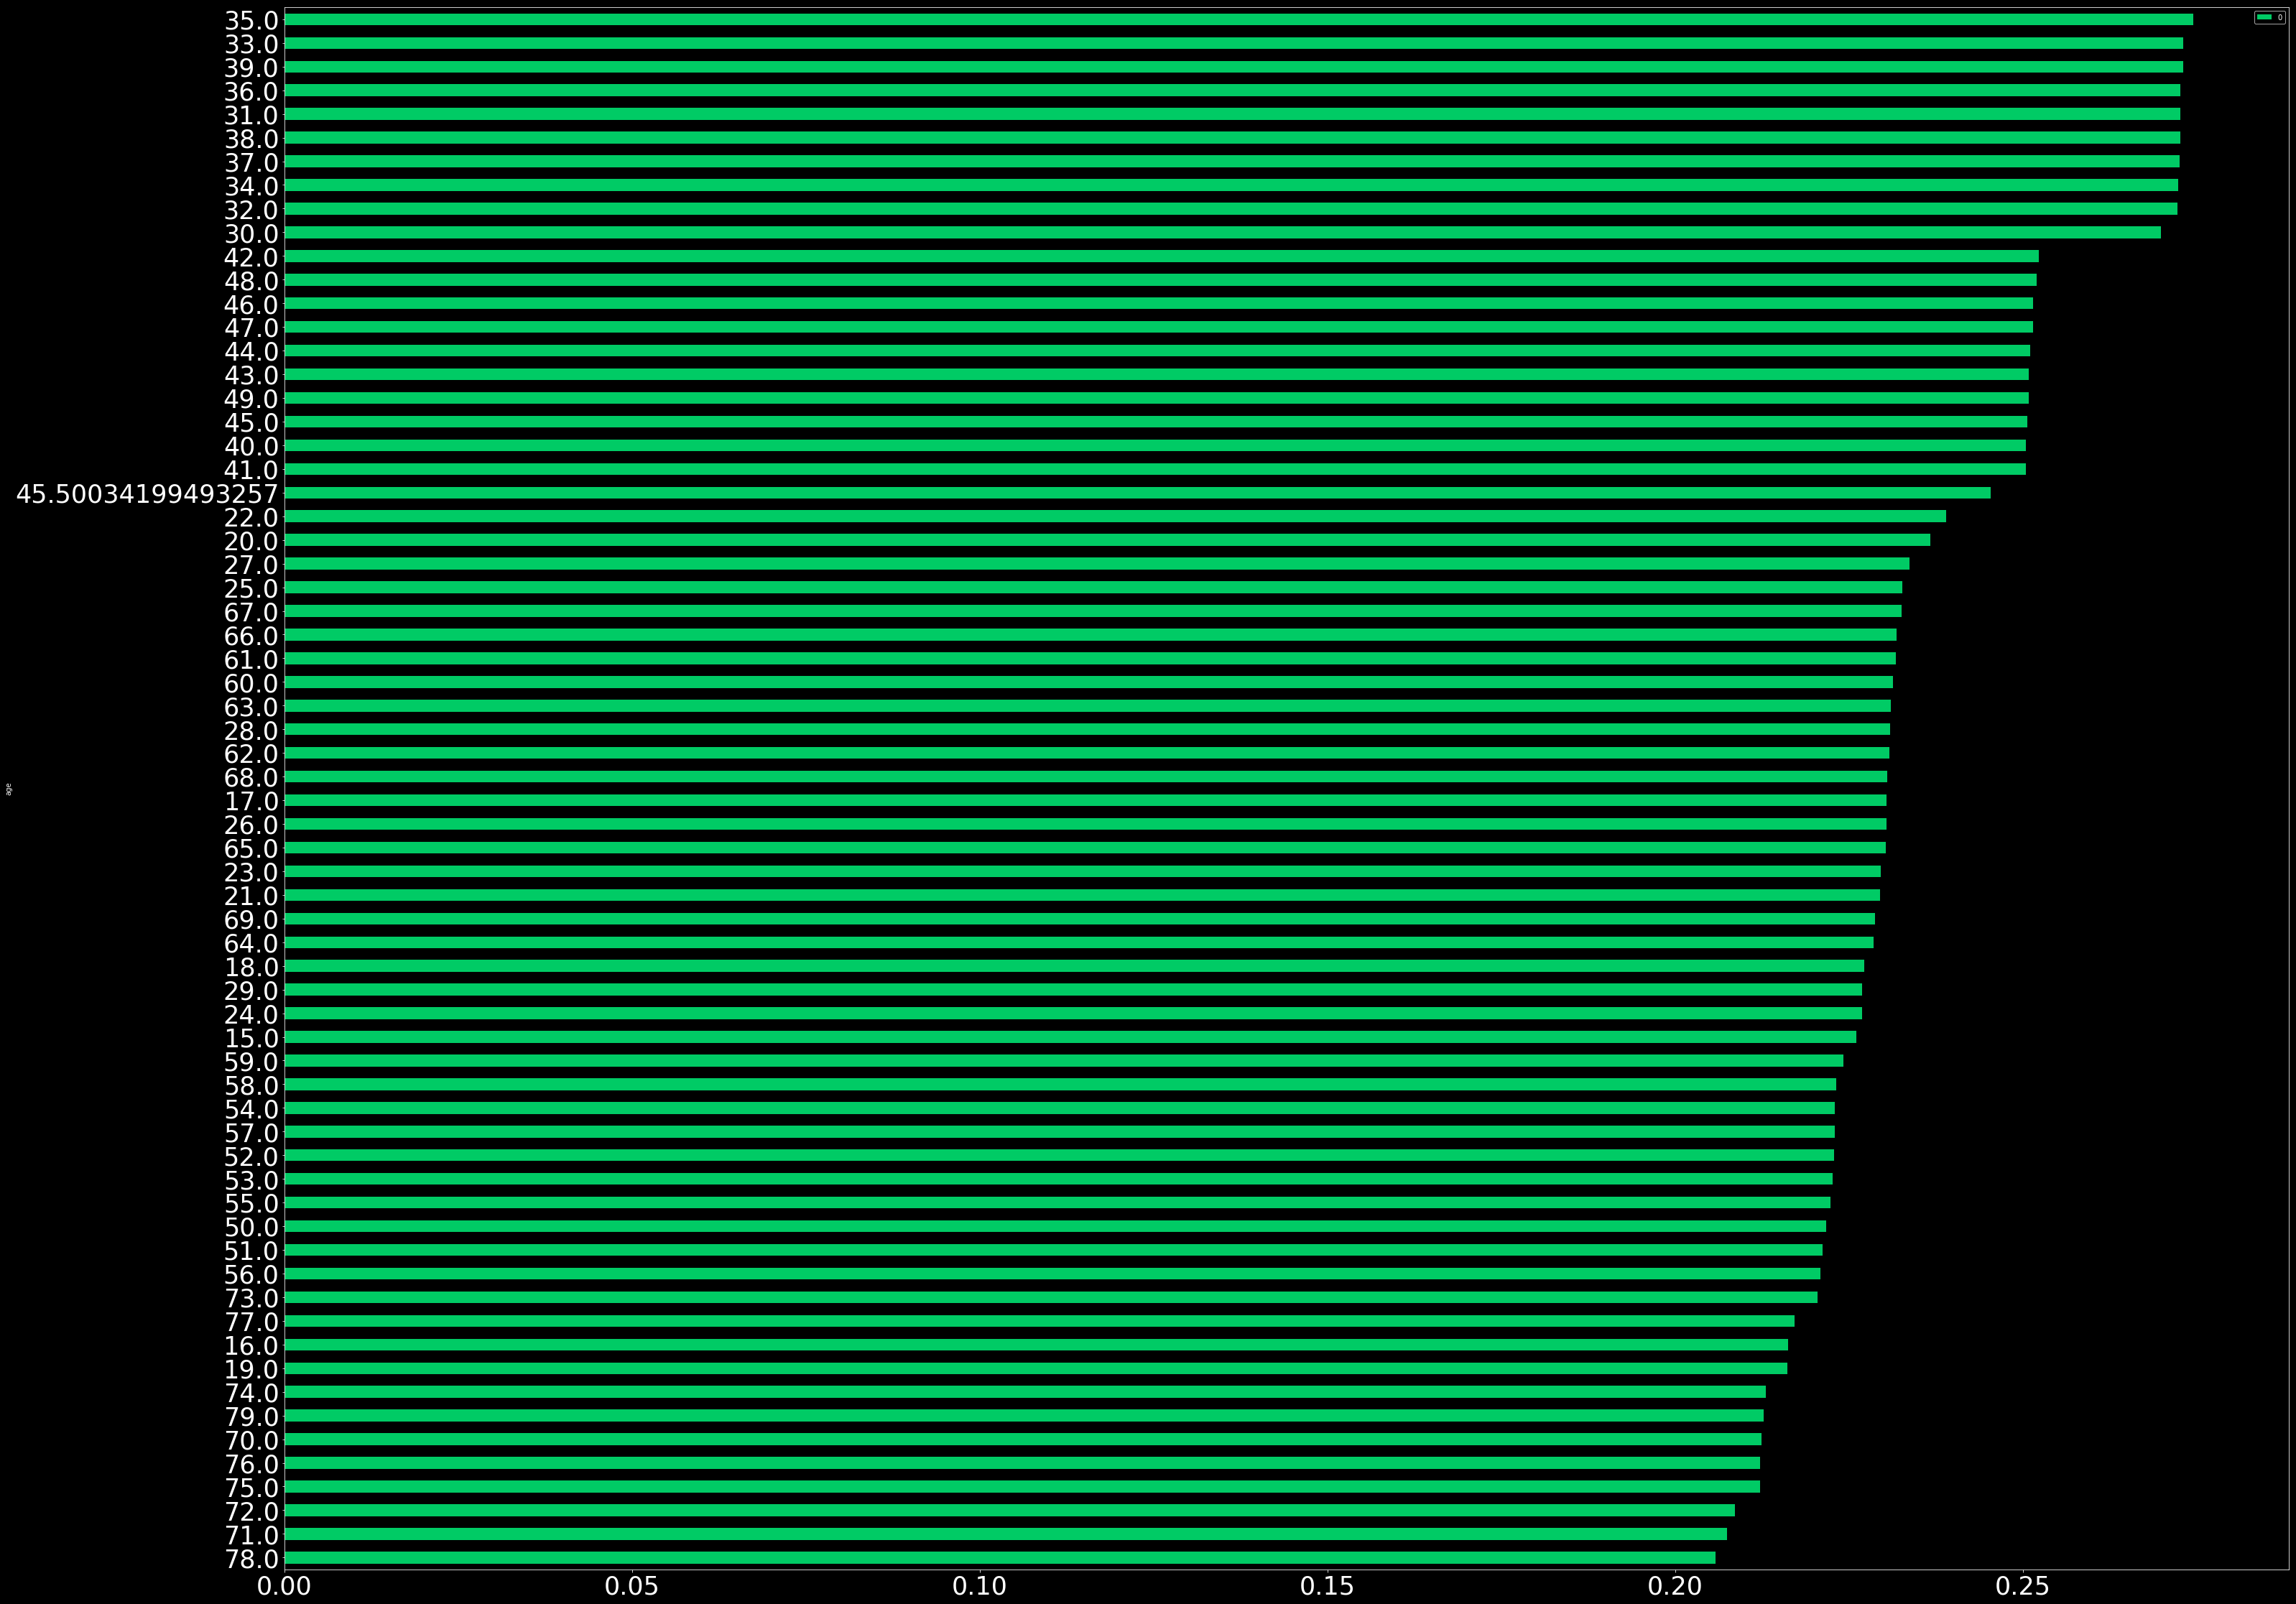

In [122]:
click_rate_rank_10.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(50,40), color="springgreen",fontsize=35)

年齢はある程度クリックに関係ありそう。 

In [123]:
# click vs female
cross_11 = pd.crosstab(df_final["female"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_11 = pd.DataFrame(cross_11[1]/(cross_11[0] + cross_11[1]))

In [124]:
cross_11

isClick,0,1
female,,
1,3943949,1288911
0,3602647,1164493


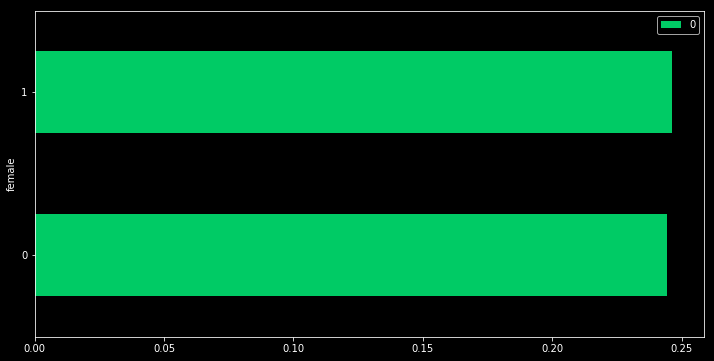

In [125]:
click_rate_rank_11.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

性別クリックに関係なさそう。


In [126]:
# click vs married
cross_12 = pd.crosstab(df_final["married"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_12 = pd.DataFrame(cross_12[1]/(cross_12[0] + cross_12[1]))

In [127]:
cross_12

isClick,0,1
married,,
0,3959766,1323694
1,3586830,1129710


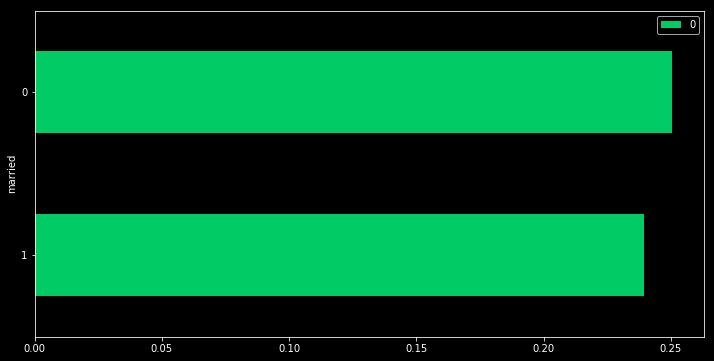

In [128]:
click_rate_rank_12.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

結婚の有無はクリックにほぼ関係なさそう。 

In [129]:
# click vs yes(hasChild)
cross_13 = pd.crosstab(df_final["yes"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_13 = pd.DataFrame(cross_13[1]/(cross_13[0] + cross_13[1]))

In [130]:
cross_13

isClick,0,1
yes,,
0,6100379,1982861
1,1446217,470543


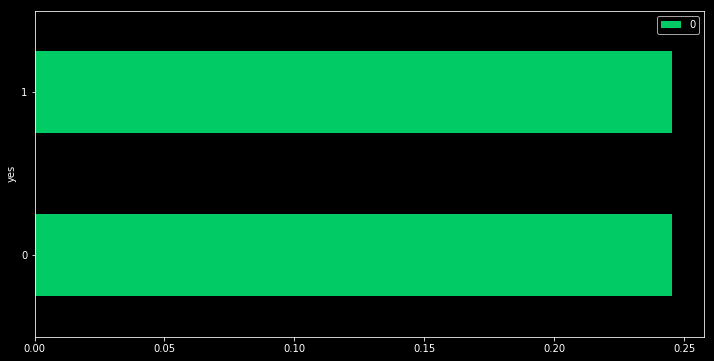

In [131]:
click_rate_rank_13.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

子供の有無もクリックにはほぼ関係なさそう。 

# df_final.corr()

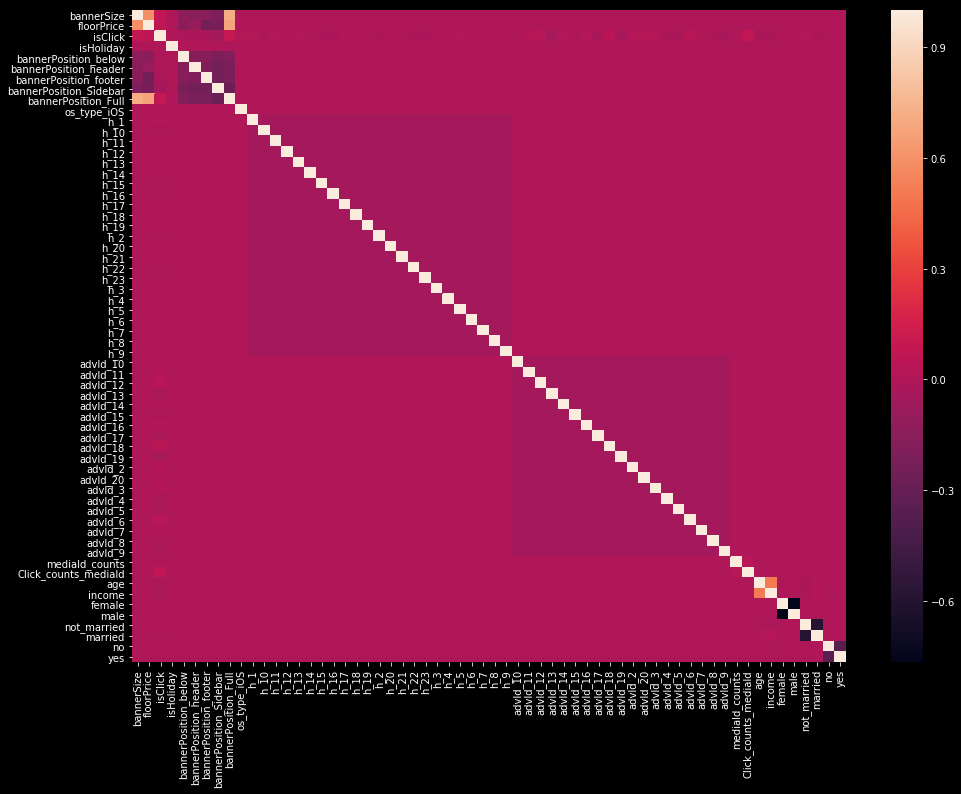

In [132]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_final.corr())
plt.show()

In [133]:
df_final.corr().T

,bannerSize,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,age,income,female,male,not_married,married,no,yes
bannerSize,1.000000,0.591001,0.081842,-0.000076,-0.132823,-0.156493,-0.156468,-0.201485,0.717416,-0.000036,0.000016,0.000246,0.000143,-0.000178,-0.000177,0.000048,0.000237,-0.000216,-0.000174,0.000207,-0.000134,-0.000318,2.052037e-04,0.000339,-0.000145,-0.000338,-0.000160,0.000015,1.788544e-04,0.000359,-0.000102,0.000125,-0.000071,0.000008,-0.000079,5.608261e-04,-0.000465,0.000036,0.000355,-0.000303,0.000214,0.000425,-3.474518e-04,-0.000155,-0.000288,-0.000027,-0.000321,-0.000108,0.000029,0.000710,-0.000144,0.000110,-0.000292,-0.000048,-0.000548,-0.000480,-0.000440,0.000552,0.000170,-0.000055,-0.000213,-0.000282
floorPrice,0.591001,1.000000,0.066762,-0.000110,-0.144959,-0.095894,-0.246529,-0.220450,0.681517,0.000221,-0.000481,-0.000053,0.000099,0.000203,-0.000171,-0.000457,0.000178,0.000580,-0.000386,-0.000127,0.000017,-0.000322,3.555847e-04,0.000048,0.000212,-0.000380,-0.000048,-0.000179,4.266409e-04,0.000230,-0.000183,0.000040,0.000194,-0.000024,-0.000385,4.410013e-04,-0.000782,-0.000124,0.000977,-0.000359,0.000160,0.000525,-4.921935e-04,-0.000091,-0.000221,0.000425,-0.000321,0.000009,-0.000117,0.000573,0.000121,0.000066,-0.001411,-0.002394,-0.000198,-0.000569,-0.000182,0.000222,0.000147,-0.000294,0.000174,-0.000147
isClick,0.081842,0.066762,1.000000,-0.005018,-0.008279,-0.009455,-0.017213,-0.042162,0.093275,0.011864,0.009669,-0.009398,0.009852,0.004201,0.009731,0.001741,-0.007663,-0.008598,0.008990,-0.003192,0.006275,-0.010189,-3.889112e-03,-0.003790,-0.010792,-0.006432,0.002245,0.002631,1.120004e-02,-0.002448,-0.003865,-0.002172,-0.004880,0.004888,0.021397,3.737700e-02,-0.036791,0.010413,-0.010371,0.015654,-0.020751,0.043404,-3.692093e-02,0.021380,0.010606,0.016675,-0.026212,-0.015900,0.038372,-0.005129,-0.009681,-0.031582,-0.003226,0.073054,-0.026507,-0.019529,0.002363,-0.002842,0.014134,-0.012778,-0.000211,0.000168
isHoliday,-0.000076,-0.000110,-0.005018,1.000000,0.000071,-0.000040,0.000294,-0.000156,0.000174,0.000182,-0.000114,0.000141,-0.000177,0.000206,0.000126,-0.000064,-0.000479,-0.000389,-0.000104,-0.000225,-0.000175,0.000052,-5.488377e-05,0.000651,0.000291,0.000164,0.000176,0.000363,-1.360829e-04,0.000327,-0.000629,0.000433,-0.000220,0.000678,-0.000304,-3.089737e-04,0.000290,-0.000172,-0.000383,-0.000375,0.000128,0.000384,3.552862e-04,-0.000277,0.000415,0.000051,-0.000161,-0.000612,0.000262,-0.000005,0.000091,0.000288,0.000496,-0.000358,0.000140,0.000002,-0.000377,0.000089,0.000155,-0.000138,0.000482,-0.000083
bannerPosition_below,-0.132823,-0.144959,-0.008279,0.000071,1.000000,-0.161027,-0.161239,-0.207511,-0.184566,-0.000424,0.000302,0.000050,0.000186,-0.000053,-0.000075,0.000301,0.000425,-0.000552,-0.000327,0.000889,-0.000449,-0.000287,-1.280453e-04,-0.000014,-0.000092,0.000181,0.000240,-0.000355,5.635719e-05,-0.000450,0.000069,-0.000082,0.000160,0.000334,-0.000027,-3.535526e-04,0.000436,0.000002,-0.000151,-0.000323,-0.000240,0.000013,3.048216e-04,0.000394,0.000353,0.000302,-0.000730,0.000097,0.000141,-0.000361,0.000093,-0.000263,-0.000069,-0.000338,-0.000159,-0.000204,0.000049,-0.000086,-0.000069,-0.000203,-0.000159,-0.000109
bannerPosition_header,-0.156493,-0.095894,-0.009455,-0.000040,-0.161027,1.000000,-0.190504,-0.245175,-0.218065,0.000426,0.000169,-0.000057,-0.000290,-0.000695,0.000024,0.000065,0.000272,0.000566,0.000507,-0.000223,-0.000491,-0.000566,-1.529015e-04,0.000408,0.000044,0.000334,0.000482,0.000258,7.742114e-05,-0.000200,-0.000101,-0.000247,-0.000033,-0.000308,0.000141,-4.146016e-06,-0.000

# preprocess（再開）  

## standarization 

In [134]:
df_final.head()

,deviceId,bannerSize,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,4,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,1,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,1,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,40.0,537.12563,1,0,0,0,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,3,9572.60,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9837,2502,42.0,536.00000,0,0,0,1,0,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,9793.30,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10117,2237,38.0,537.12563,1,0,0,0,0,0


In [135]:
print("------- df_final --------")
print("")  
print("data type:\n",df_final.dtypes)
print("")
print("number of null:\n",df_final.isnull().sum())
print("")
print("data length:\n",df_final.shape)
print("")
print("u_unique:\n",df_final.nunique())
print("")
print("columns:\n",df_final.columns)

------- df_final --------

data type:
 deviceId                   object
bannerSize                  int64
floorPrice                float64
isClick                     int64
isHoliday                   int64
bannerPosition_below        uint8
bannerPosition_header       uint8
bannerPosition_footer       uint8
bannerPosition_Sidebar      uint8
bannerPosition_Full         uint8
os_type_iOS                 uint8
h_1                         uint8
h_10                        uint8
h_11                        uint8
h_12                        uint8
h_13                        uint8
h_14                        uint8
h_15                        uint8
h_16                        uint8
h_17                        uint8
h_18                        uint8
h_19                        uint8
h_2                         uint8
h_20                        uint8
h_21                        uint8
h_22                        uint8
h_23                        uint8
h_3                         uint8
h_4      

In [136]:
# データの標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

list_target = list(df_final.drop(["deviceId","isClick"],axis=1).columns)
for target in list_target:
    df_final[target] = std.fit_transform(df_final[target].values.reshape(-1,1))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by Stand

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by Stand

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by Stand

In [137]:
df_final.head()

,deviceId,bannerSize,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,1.435001,3.587898,0,1.580800,-0.369175,-0.43618,-0.436756,-0.562095,2.000234,0.733663,-0.208483,-0.208461,-0.20871,-0.208487,-0.208498,-0.20852,-0.208481,-0.208252,-0.208595,-0.208694,-0.208554,-0.208497,-0.208377,-0.208543,4.795517,-0.208645,-0.208242,-0.208556,-0.208489,-0.208636,-0.208723,-0.20827,-0.208392,-0.229282,4.357771,-0.229639,-0.229578,-0.229416,-0.229475,-0.229394,-0.229514,-0.229362,-0.229184,-0.229131,-0.229789,-0.229378,-0.229356,-0.229234,-0.229522,-0.229395,-0.229469,-0.229373,1.090917,1.229409,-1.013100,-1.047532e+00,0.954464,-0.729444,-0.621451,1.058394,-0.745946,2.053567
1,57525600-3f29-4ff9-b236-ea32fc43d78c,-1.024873,-0.765948,1,1.580800,-0.369175,-0.43618,-0.436756,1.779058,-0.499941,0.733663,-0.208483,-0.208461,-0.20871,-0.208487,-0.208498,-0.20852,-0.208481,-0.208252,-0.208595,-0.208694,-0.208554,-0.208497,-0.208377,-0.208543,-0.208528,-0.208645,4.802105,-0.208556,-0.208489,-0.208636,-0.208723,-0.20827,-0.208392,-0.229282,-0.229475,-0.229639,-0.229578,-0.229416,-0.229475,-0.229394,-0.229514,-0.229362,-0.229184,-0.229131,-0.229789,-0.229378,-0.229356,-0.229234,4.356886,-0.229395,-0.229469,-0.229373,0.405671,1.860767,0.693112,1.865015e+00,0.954464,-0.729444,1.609138,-0.944828,1.340580,-0.486958
2,18221f19-865b-4923-a5a9-ea13239d3aad,-1.024873,-0.056739,0,-0.632591,-0.369175,-0.43618,-0.436756,1.779058,-0.499941,0.733663,-0.208483,-0.208461,-0.20871,-0.208487,-0.208498,-0.20852,-0.208481,-0.208252,-0.208595,-0.208694,4.794923,-0.208497,-0.208377,-0.208543,-0.208528,-0.208645,-0.208242,-0.208556,-0.208489,-0.208636,-0.208723,-0.20827,-0.208392,-0.229282,-0.229475,-0.229639,-0.229578,-0.229416,-0.229475,-0.229394,-0.229514,-0.229362,-0.229184,-0.229131,-0.229789,-0.229378,-0.229356,-0.229234,-0.229522,-0.229395,-0.229469,-0.229373,0.052666,0.407693,-0.586547,4.515249e-15,0.954464,-0.729444,-0.621451,-0.944828,1.340580,-0.486958
3,68a69f8a-a3d6-467a-832a-04f626737a81,0.615043,0.203947,1,-0.632591,-0.369175,-0.43618,-0.436756,1.779058,-0.499941,-1.363024,-0.208483,-0.208461,-0.20871,-0.208487,-0.208498,-0.20852,-0.208481,-0.208252,-0.208595,4.791715,-0.208554,-0.208497,-0.208377,-0.208543,-0.208528,-0.208645,-0.208242,-0.208556,-0.208489,-0.208636,-0.208723,-0.20827,-0.208392,-0.229282,-0.229475,-0.229639,-0.229578,-0.229416,-0.229475,-0.229394,-0.229514,-0.229362,-0.229184,4.364309,-0.229789,-0.229378,-0.229356,-0.229234,-0.229522,-0.229395,-0.229469,-0.229373,-1.701977,0.153880,-0.373270,-1.490205e-02,-1.047709,-0.729444,-0.621451,1.058394,-0.745946,-0.486958
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,-1.024873,0.280005,0,1.580800,-0.369175,-0.43618,-0.436756,-0.562095,-0.499941,0.733663,4.796544,-0.208461,-0.20871,-0.208487,-0.208498,-0.20852,-0.208481,-0.208252,-0.208595,-0.208694,-0.208554,-0.208497,-0.208377,-0.208543,-0.208528,-0.208645,-0.208242,-0.208556,-0.208489,-0.208636,-0.208723,-0.20827,-0.208392,-0.229282,-0.229475,-0.229639,-0.229578,-0.229416,4.357775,-0.229394,-0.229514,-0.229362,-0.229184,-0.229131,-0.229789,-0.229378,-0.229356,-0.229234,-0.229522,-0.229395,-0.229469,-0.229373,1.205124,-0.686872,-0.799823,4.515249e-15,0.954464,-0.729444,-0.621451,-0.944828,-0.745946,-0.486958


In [138]:
X = df_final.drop(["deviceId","isClick"],axis=1).values
y = df_final["isClick"].values

# modeling 

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## logistic regression

In [150]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
%%time
lr = LogisticRegression(penalty='l1',C=1.0)
lr.fit(X_train, y_train)

CPU times: user 4min 57s, sys: 1min 28s, total: 6min 25s
Wall time: 7min 36s


In [152]:
# 切片
lr.intercept_

array([-1.16368887])

In [153]:
# 係数
lr.coef_

array([[ 7.71743582e-02, -1.76467241e-04, -1.17243688e-02,
         2.76660823e-02,  3.17567753e-02,  1.53733017e-02,
        -2.03069039e-02,  1.62813311e-01,  2.81581631e-02,
        -2.09899096e-03, -4.60289448e-02, -2.20821952e-03,
        -1.40281001e-02, -1.68025605e-03, -1.96717807e-02,
        -4.18818096e-02, -4.40459761e-02, -4.45463335e-03,
        -3.21299798e-02, -9.35626794e-03, -4.79407354e-02,
        -3.29735517e-02, -3.28628174e-02, -5.00120724e-02,
        -3.86409167e-02, -1.86408278e-02, -1.83700226e-02,
         1.01138703e-03, -2.91876073e-02, -3.23127909e-02,
        -2.86163552e-02, -3.50032590e-02,  7.68088359e-02,
         1.11976563e-01,  1.43395818e-01, -2.67585643e-02,
         8.86062341e-02,  4.21139657e-02,  1.00069741e-01,
         1.68534817e-02,  1.54519814e-01, -2.76248154e-02,
         1.12005384e-01,  9.00938940e-02,  1.01565527e-01,
         2.85369892e-03,  2.77699859e-02,  1.44962376e-01,
         5.42419177e-02,  4.37593614e-02, -1.26758899e-0

## SVM

In [474]:
from sklearn.svm import SVC

In [ ]:
%%time
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

## XGBoost

In [143]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

In [144]:
xgb = xgb.XGBClassifier()

In [145]:
param_grid = {'learning_rate': [0.1,0.3,0.5],'max_depth':[3,5,10],'min_child_weight':[1,5,10],
             'subsample':[0.8,0.9,1.0],'colsample_bytree':[0.5,1.0]}
gs_xgb = GridSearchCV(xgb, param_grid, cv=5)

In [ ]:
%%time
gs_xgb.fit(X_train,y_train)

[10:23:05] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'


In [ ]:
gs_xgb.best_params_

best paramatorで学習 

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(colsample_bytree=1.0,learning_rate=0.5,max_depth=3,
                        min_child_weight=10,subsample=1.0)

In [ ]:
%%time
xgb.fit(X_train, y_train)

## evaluation（主にtestに関して） 

### Accuracy

In [154]:
# accuracy
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.755
test acc: 0.755


### confusion matrix 

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))

In [146]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

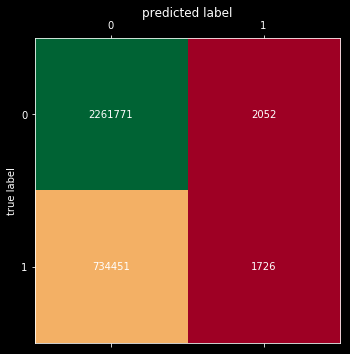

In [147]:
plot_cm(cm)

### ROC Curve and AUC 

In [465]:
from sklearn import metrics

In [466]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict(X_test))
auc = metrics.auc(fpr, tpr)

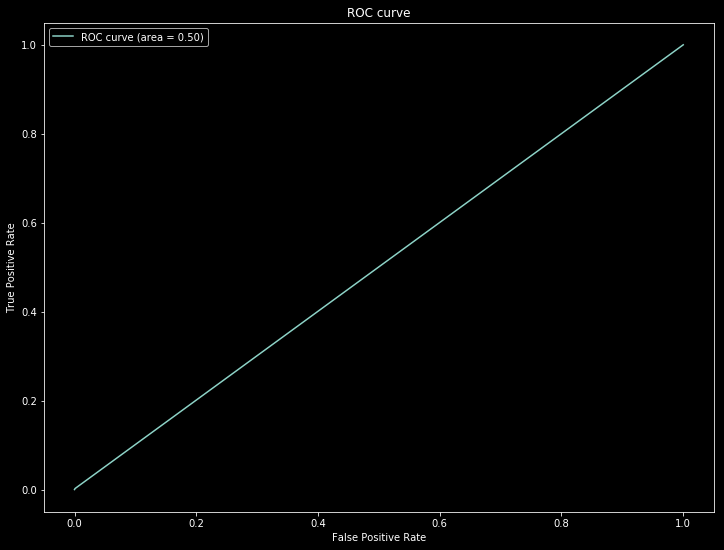

In [467]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

## evaluation（trainに関して） 

 ### confusion matrix 

In [469]:
cm = confusion_matrix(y_train, lr.predict(X_train))

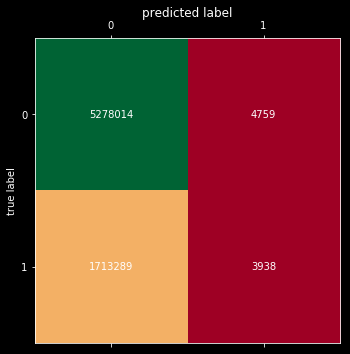

In [470]:
plot_cm(cm)

### ROC Curve and AUC 

In [472]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, lr.predict(X_train))
auc = metrics.auc(fpr, tpr)

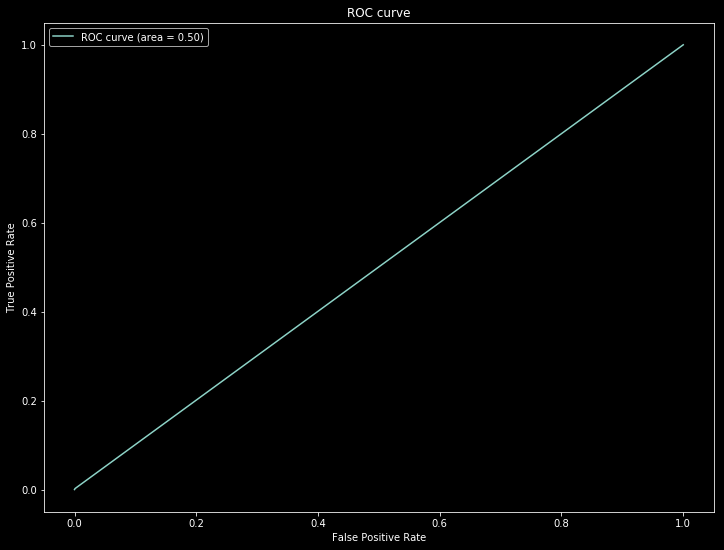

In [473]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)